In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
data = pd.read_csv("./01_사용할_DataSet/Steel_industry_data.csv")

In [3]:
# 데이터 확인
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [4]:
# 날짜와 시간은 에너지 타입을 정하는데 상관이 크게 없을것으로 판단
# 그러므로 우리는 사용하지 않을것이다.
data = data.iloc[:,1:]         # 날짜시간 컬럼 제거

In [5]:
# WeekStatus은 Day_of_week에 포함되는 데이터로 판단
# 그러므로 우리는 사용하지 않을것이다.
data = data.drop(columns=["WeekStatus"])   # WeekStatus은 컬럼 제거

In [6]:
# 문자열 데이터 숫자로 바꾸기(Day_of_week)
week_name_list = data["Day_of_week"].unique()

for i in range(len(week_name_list)):
    print(i)
    print(week_name_list[i])
    data = data.replace(to_replace=week_name_list[i], value=i)

0
Monday
1
Tuesday
2
Wednesday
3
Thursday
4
Friday
5
Saturday
6
Sunday


C:\Users\Admin\AppData\Local\Temp\ipykernel_6488\3170502510.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(to_replace=week_name_list[i], value=i)


In [7]:
# 문자열 데이터 숫자로 바꾸기(Load_Type)
load_type_list = data["Load_Type"].unique()

for i in range(len(load_type_list)):
    print(i)
    print(load_type_list[i])
    data = data.replace(to_replace=load_type_list[i], value=i)

0
Light_Load
1
Medium_Load
2
Maximum_Load


C:\Users\Admin\AppData\Local\Temp\ipykernel_6488\3584304251.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(to_replace=load_type_list[i], value=i)


In [8]:
import matplotlib.pyplot as plt

# tmp = data.drop(columns=["NSM"])
# tmp.boxplot()
# plt.show().d

In [9]:
data.duplicated().value_counts()

False    34959
True        81
Name: count, dtype: int64

In [10]:
# 중복데이터 제거
data = data.drop_duplicates()

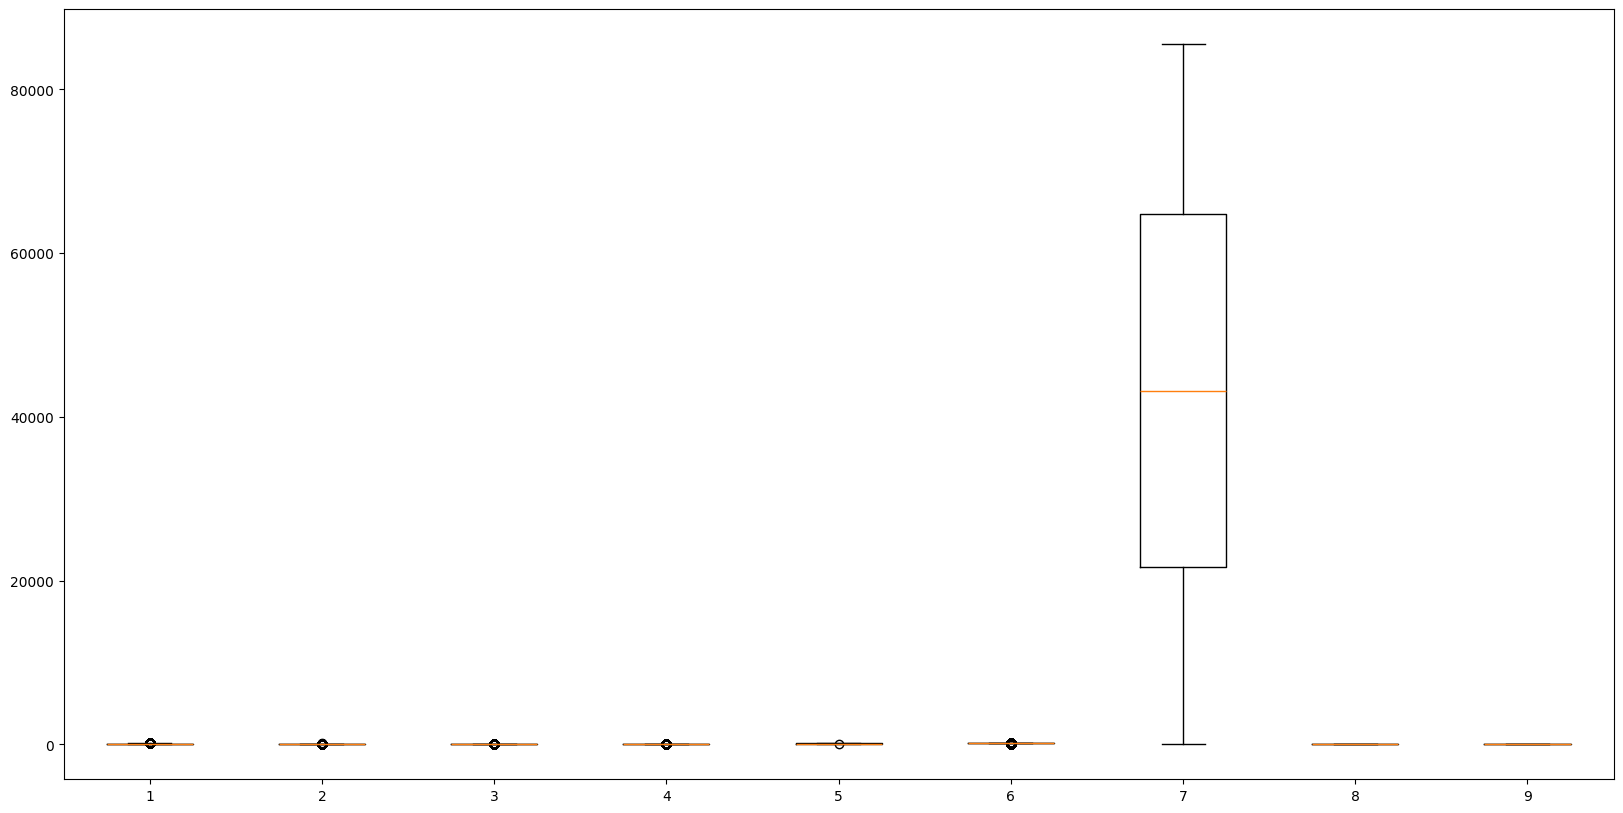

In [11]:
plt.figure(figsize=(20, 10))
plt.boxplot(data)
plt.show()

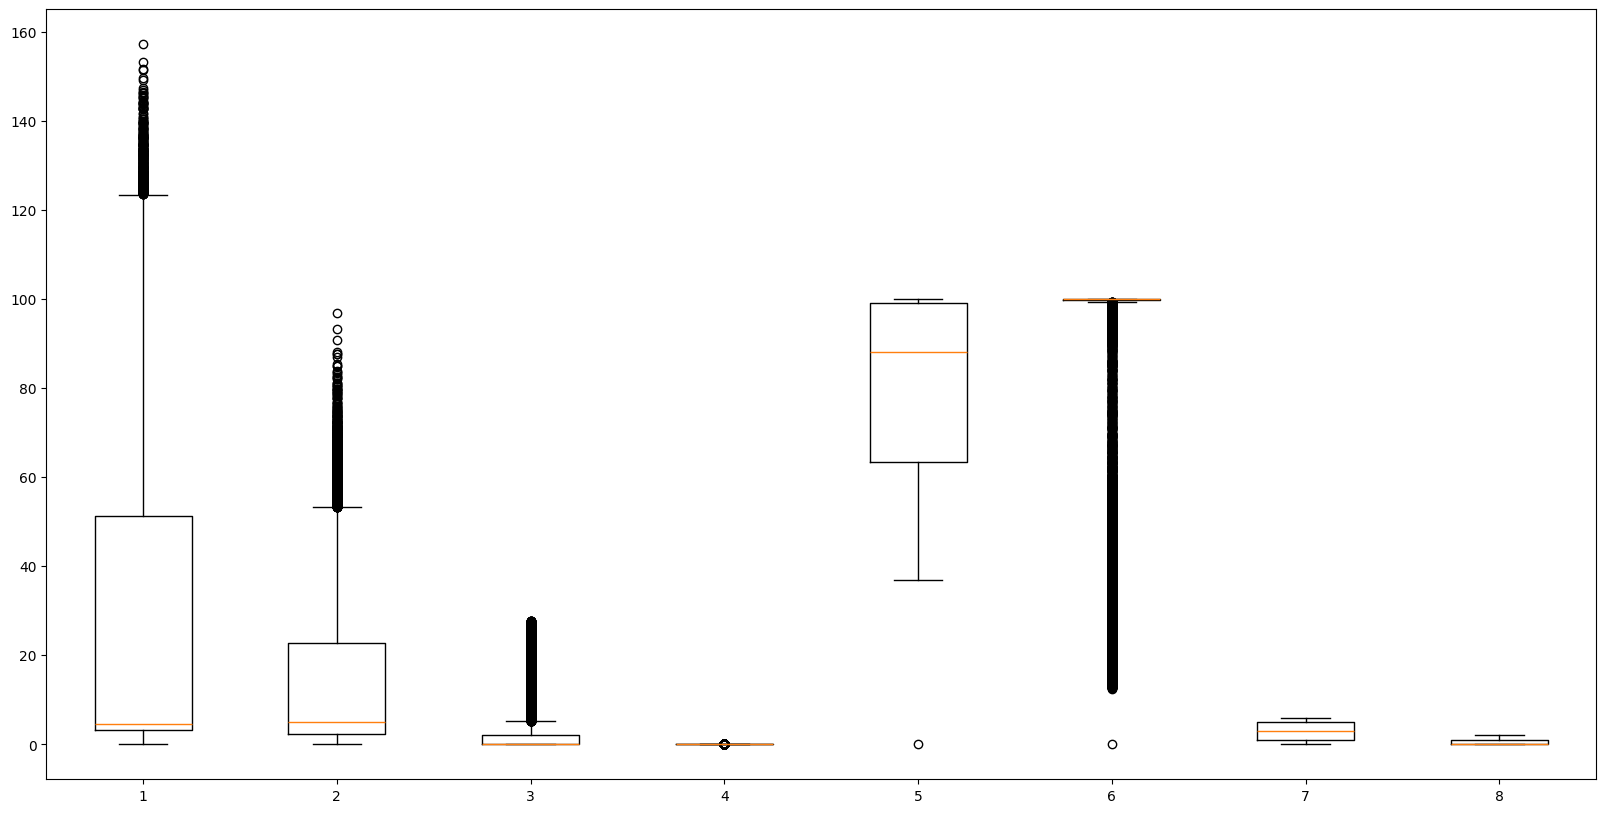

In [12]:
tmp = data.drop(columns=["NSM"])
plt.figure(figsize=(20, 10))
plt.boxplot(tmp)
plt.show()

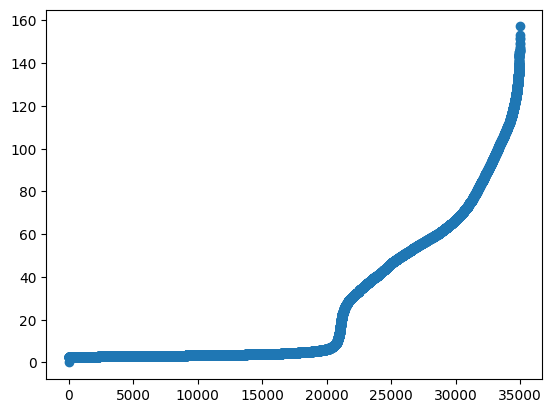

In [13]:
tmp = data.sort_values(by='Usage_kWh').reset_index(drop=True)
plt.plot(tmp['Usage_kWh'], marker='o', linestyle='-')
plt.show()

In [14]:
# 컬럼 하나하나 선그래프를 찍어 봤는데 부드럽게 연결 되어 이상치라고 판단하기 어려움
# 이상치를 제거하지 않은 데이터와 이상치를 제거한 데이터를 이용해서
# 종속변수와 상관관계가 더 높은 데이터를 사용하기로 판단

In [15]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

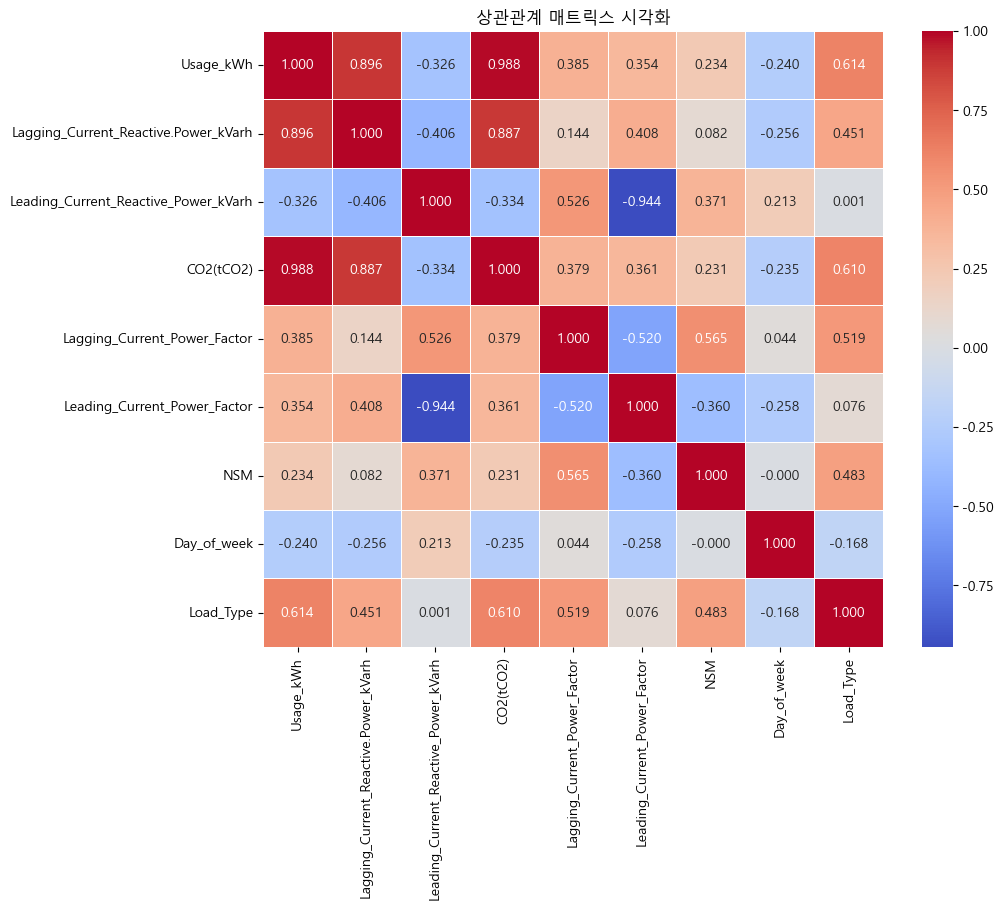

In [16]:
import seaborn as sns
corr_matrix = data.corr()
corr_matrix

### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

In [17]:
# Leading_Current_Reactive_Power_kVarh, Leading_Current_Power_Factor, Day_of_week
# 이 세가지 변수는 종속변수와 상관관계가 낮아 p-value 확인후 제거하기로 판단하였다.

# 피어슨 스피어만 상관계수 확인
from scipy.stats import spearmanr, pearsonr
X = data[["Leading_Current_Reactive_Power_kVarh", "Leading_Current_Power_Factor", "Day_of_week"]]
y = data["Load_Type"]

for col in X.columns:
    s, p = pearsonr(X[col], y)
    msg = f"""독립변수({col})와 종속변수의 상관관계 계수는 {s:.3f}이고, 
p-value의 값은 {p:.3f} 입니다.
    """
    print("pearsonr")
    print(msg)
    s, p = spearmanr(X[col], y)
    msg = f"""독립변수({col})와 종속변수의 상관관계 계수는 {s:.3f}이고, 
p-value의 값은 {p:.3f} 입니다.
    """
    print("spearmanr")

    print(msg)
    

    print("----------------------------")
    
data = data.drop(columns=["Leading_Current_Reactive_Power_kVarh"])

pearsonr
독립변수(Leading_Current_Reactive_Power_kVarh)와 종속변수의 상관관계 계수는 0.001이고, 
p-value의 값은 0.834 입니다.
    
spearmanr
독립변수(Leading_Current_Reactive_Power_kVarh)와 종속변수의 상관관계 계수는 0.082이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(Leading_Current_Power_Factor)와 종속변수의 상관관계 계수는 0.076이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Leading_Current_Power_Factor)와 종속변수의 상관관계 계수는 -0.027이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(Day_of_week)와 종속변수의 상관관계 계수는 -0.168이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Day_of_week)와 종속변수의 상관관계 계수는 -0.177이고, 
p-value의 값은 0.000 입니다.
    
----------------------------


In [18]:
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type
0,3.17,2.95,0.0,73.21,100.00,900,0,0
1,4.00,4.46,0.0,66.77,100.00,1800,0,0
2,3.24,3.28,0.0,70.28,100.00,2700,0,0
3,3.31,3.56,0.0,68.09,100.00,3600,0,0
4,3.82,4.50,0.0,64.72,100.00,4500,0,0
...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.0,62.10,100.00,82800,0,0
35036,3.74,3.74,0.0,70.71,100.00,83700,0,0
35037,3.78,3.17,0.0,76.62,99.98,84600,0,0
35038,3.78,3.06,0.0,77.72,99.96,85500,0,0


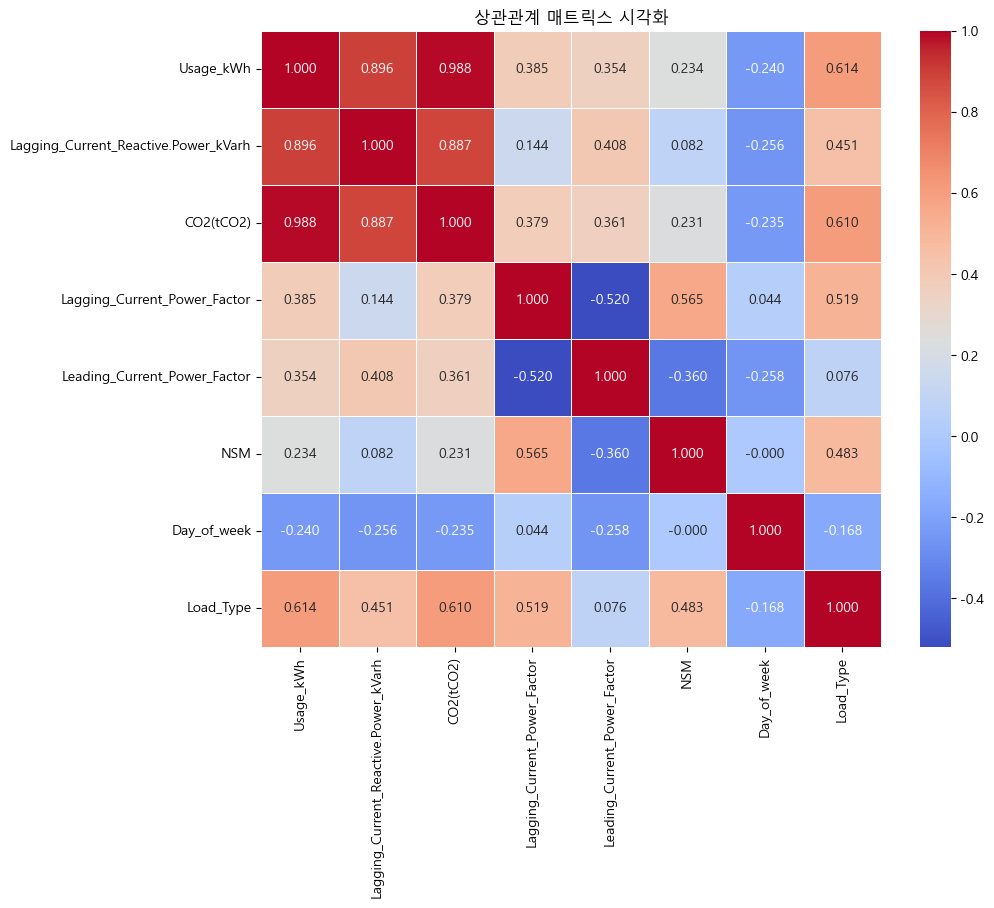

In [19]:
corr_matrix = data.corr()
corr_matrix

### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

In [20]:
#  CO2(tCO2) 은 Usage_kWh과 상관관계가 높으므로 
# 대표하는 Usage_kWh만 남기고 제거
data = data.drop(columns=["CO2(tCO2)"])

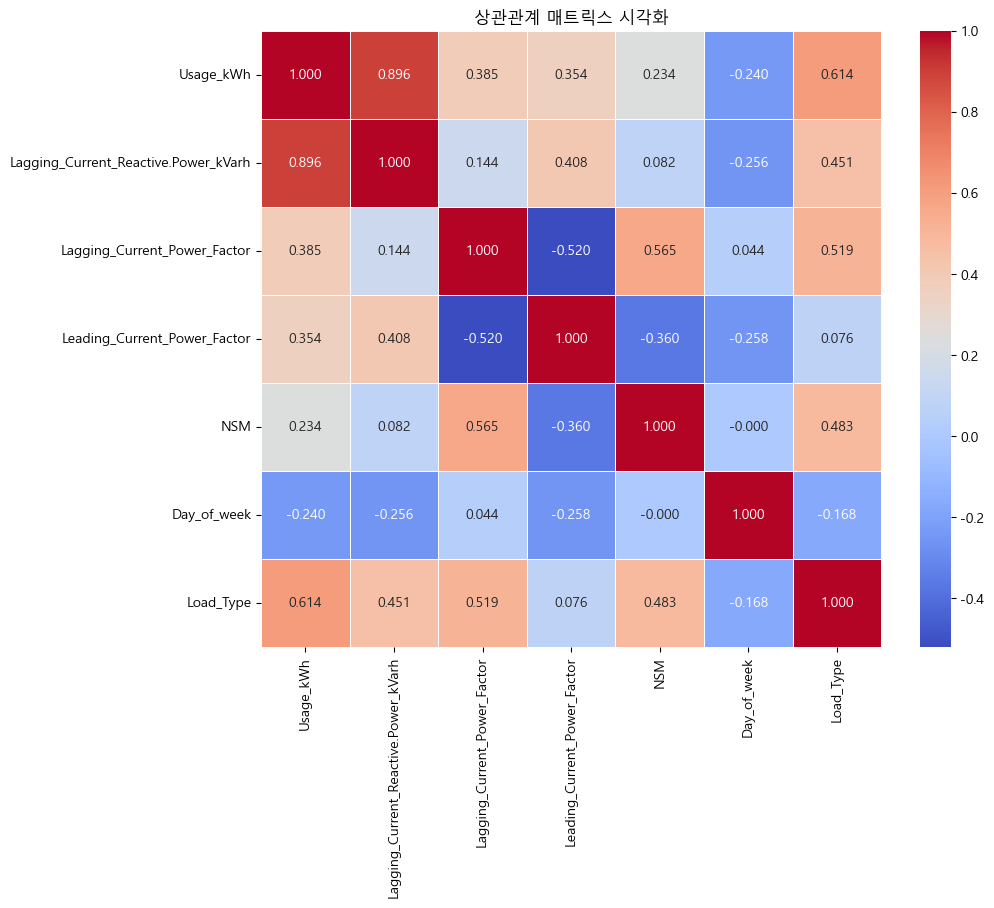

In [21]:
corr_matrix = data.corr()
corr_matrix

### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

In [22]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

droped_data = remove_outliers(data)

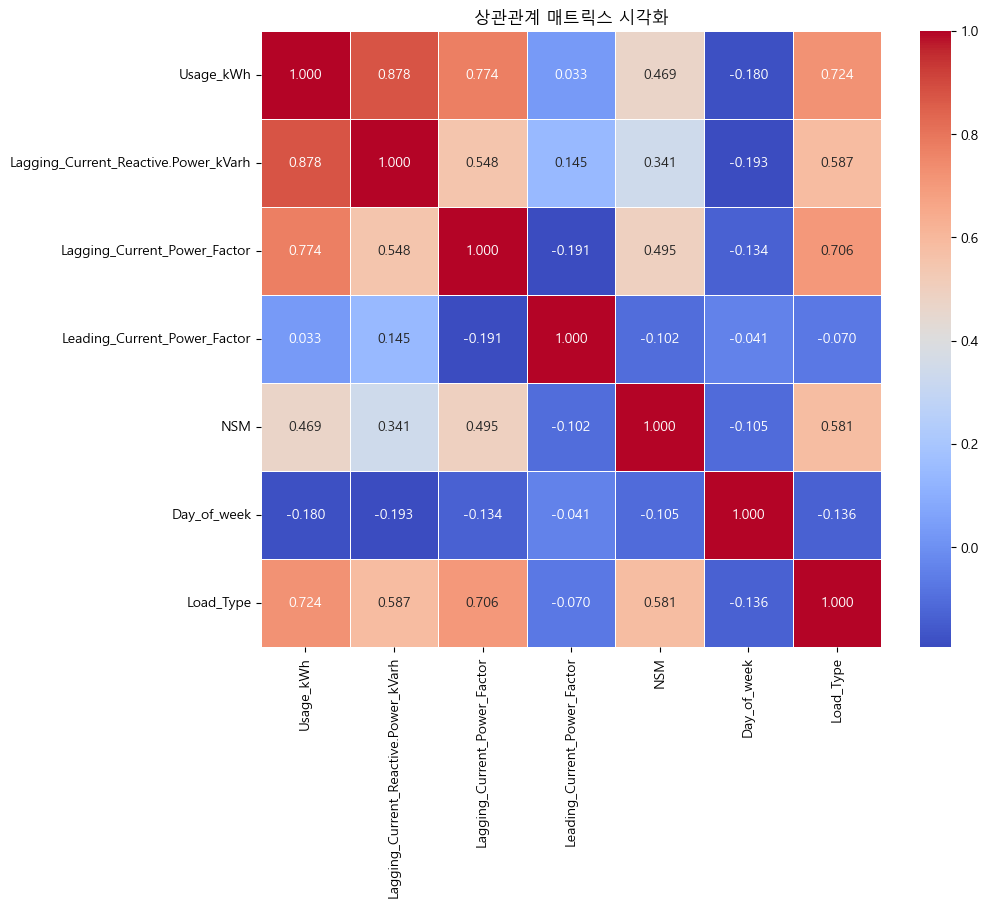

In [23]:
corr_matrix = droped_data.corr()
corr_matrix

### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

In [24]:
# 이상치를 드랍한 데이터가 조금 더 높은 상관관계를 가지므로 앞으로 드람한 데이터를 사용할 것이다.
# 하지만 2개 컴럼은 오히려 상관관계가 감소하였다.

In [25]:
def remove_outliers_specific_column(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]

drop_column_name_list = list(data.columns)
drop_column_name_list.remove("Leading_Current_Power_Factor")
drop_column_name_list.remove("Day_of_week")
droped_data = data.copy()
for column in drop_column_name_list:
    droped_data = remove_outliers_specific_column(droped_data, column)


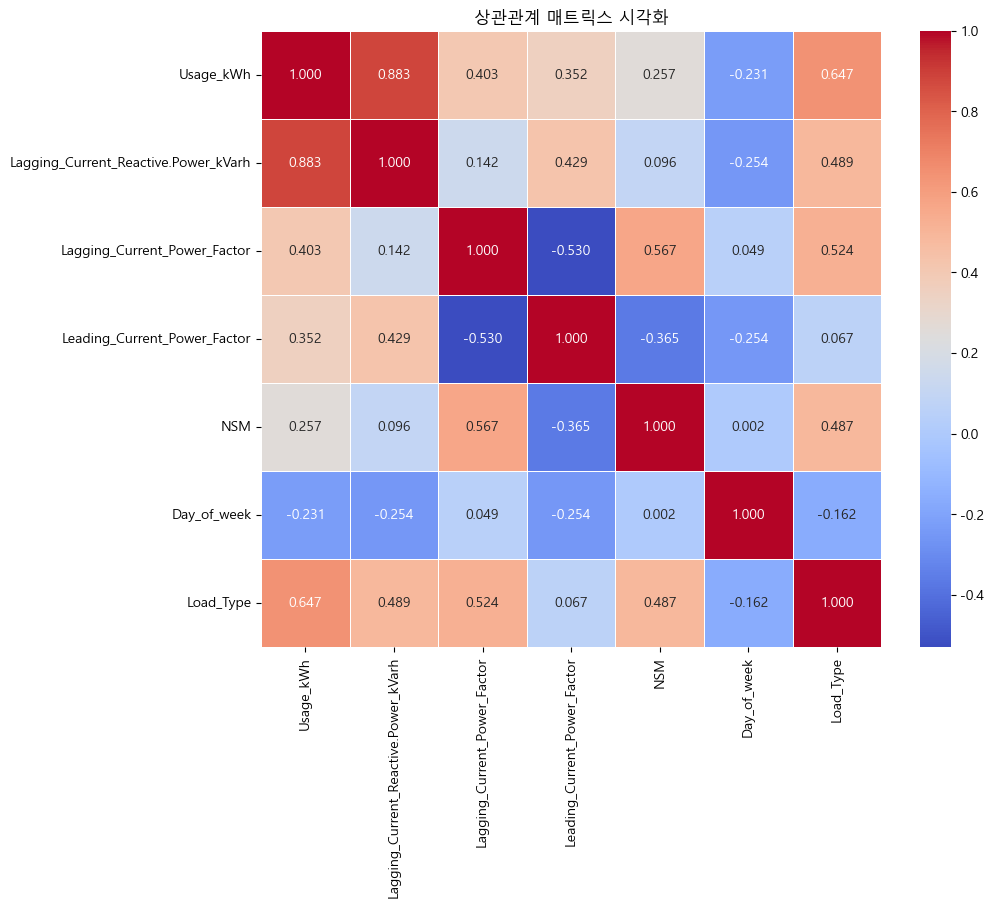

In [26]:
corr_matrix = droped_data.corr()
corr_matrix

### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

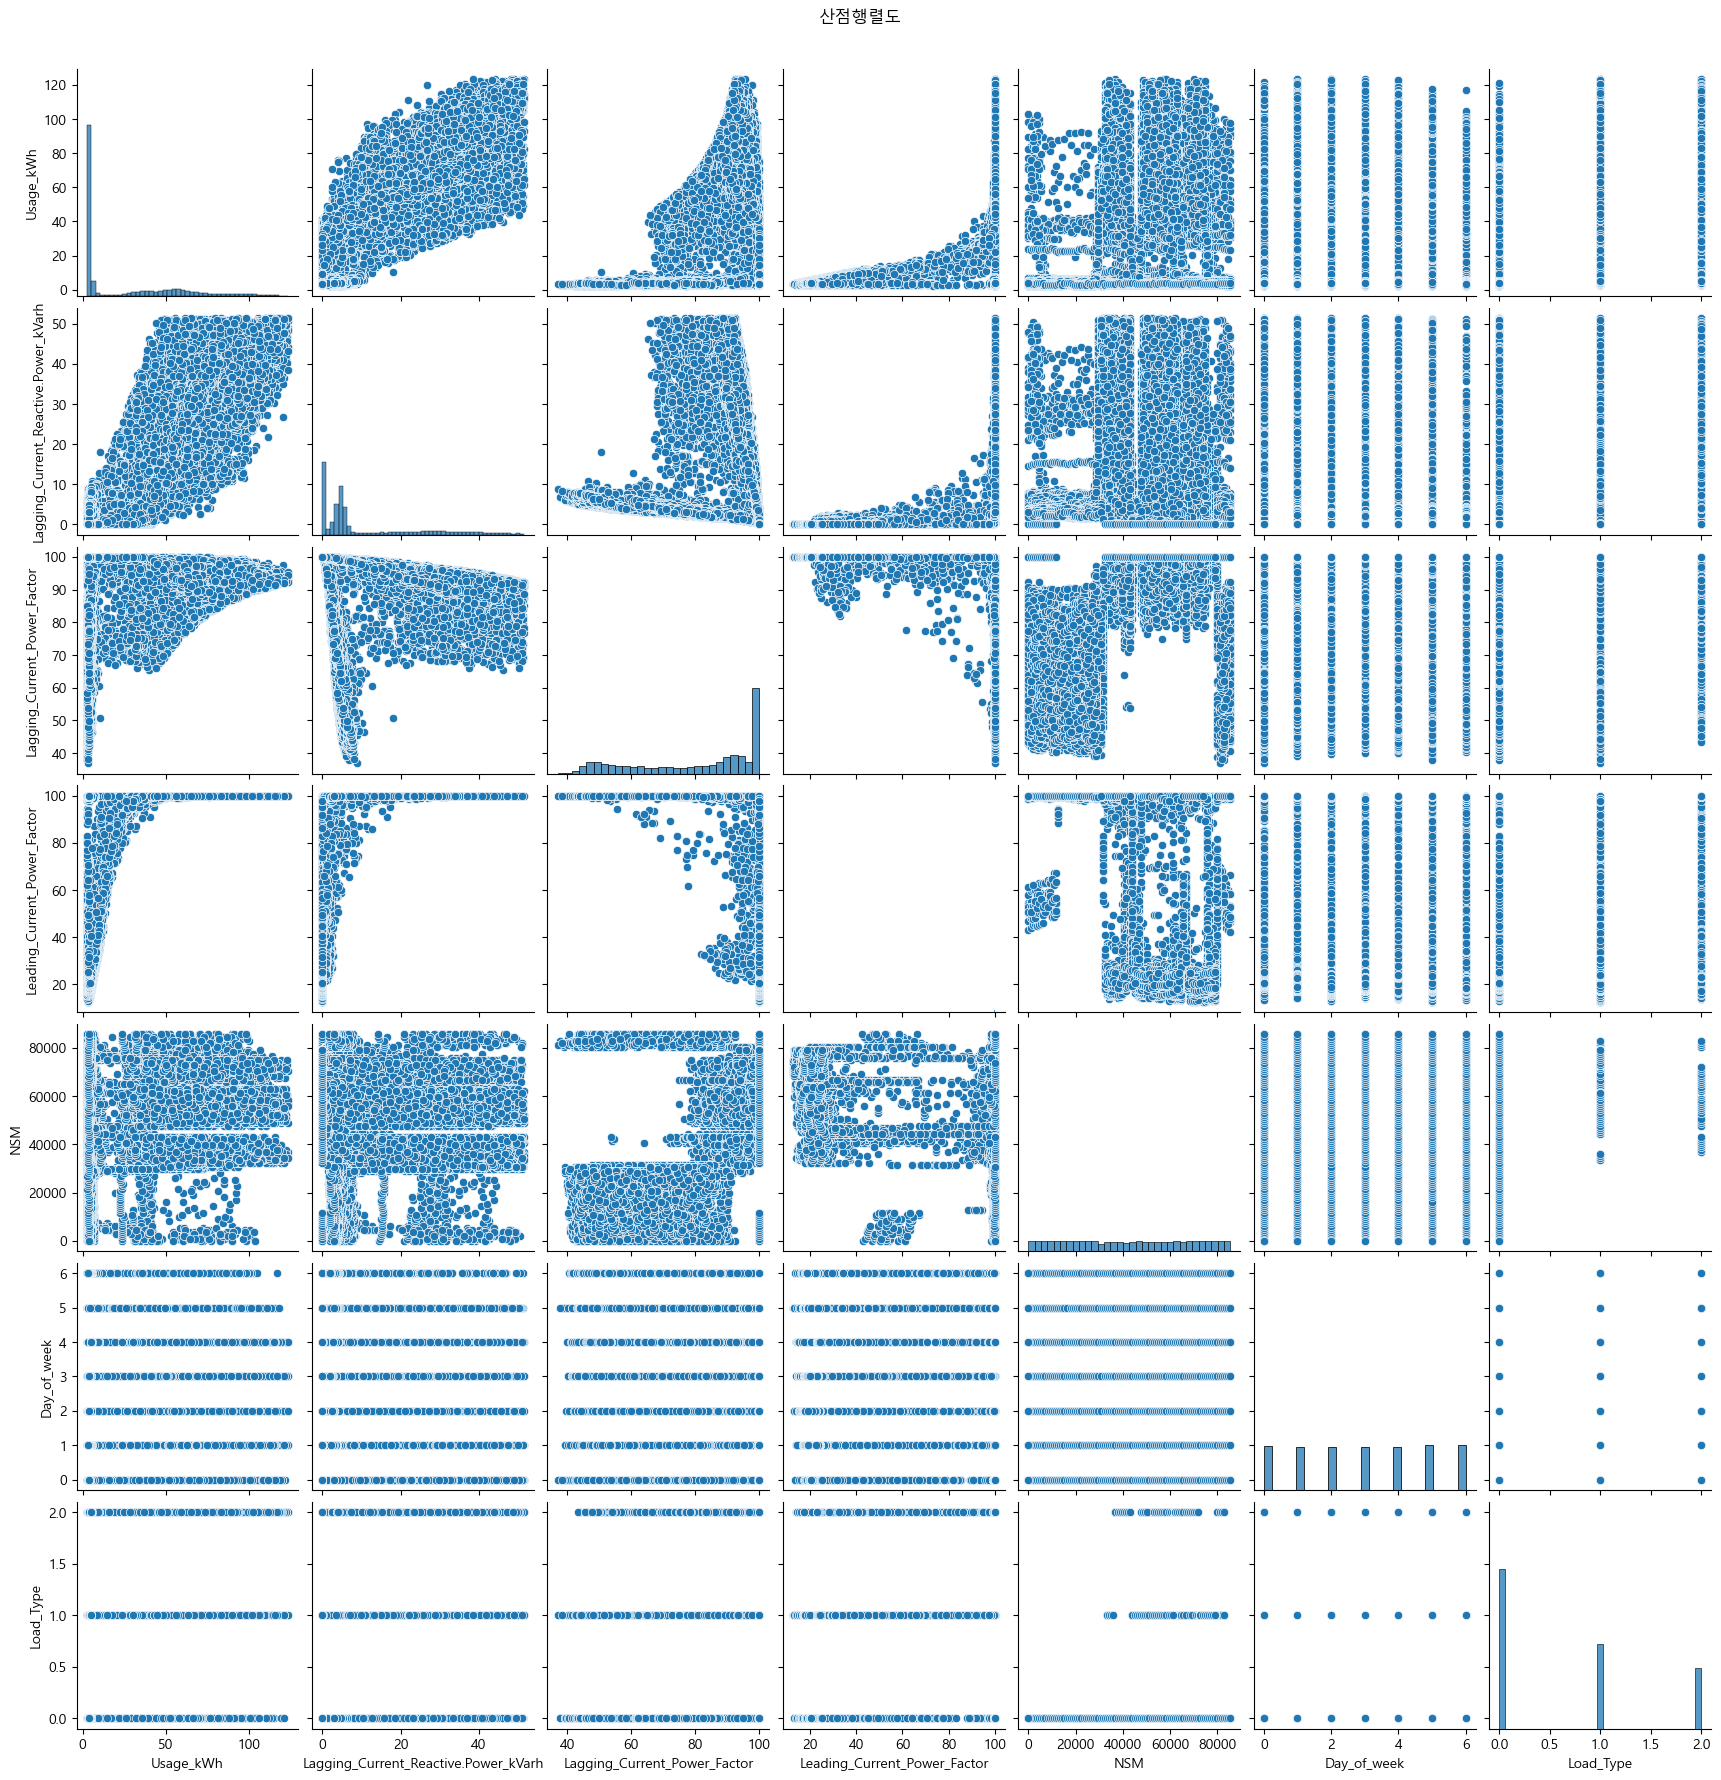

In [27]:
sns.pairplot(droped_data)
plt.suptitle("산점행렬도", y=1.02)
plt.show()

In [28]:
# 독립변수, 종속변수 분리
X = droped_data.iloc[:, :-1]
y = droped_data["Load_Type"]
X.shape, y.shape

((33642, 6), (33642,))

In [29]:
# 피어슨 스피어만 상관계수 확인
from scipy.stats import spearmanr, pearsonr

for col in X.columns:
    s, p = pearsonr(X[col], y)
    msg = f"""독립변수({col})와 종속변수의 상관관계 계수는 {s:.3f}이고, 
p-value의 값은 {p:.3f} 입니다.
    """
    print("pearsonr")
    print(msg)
    s, p = spearmanr(X[col], y)
    msg = f"""독립변수({col})와 종속변수의 상관관계 계수는 {s:.3f}이고, 
p-value의 값은 {p:.3f} 입니다.
    """
    print("spearmanr")

    print(msg)
    

    print("----------------------------")

pearsonr
독립변수(Usage_kWh)와 종속변수의 상관관계 계수는 0.647이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Usage_kWh)와 종속변수의 상관관계 계수는 0.714이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(Lagging_Current_Reactive.Power_kVarh)와 종속변수의 상관관계 계수는 0.489이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Lagging_Current_Reactive.Power_kVarh)와 종속변수의 상관관계 계수는 0.353이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(Lagging_Current_Power_Factor)와 종속변수의 상관관계 계수는 0.524이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Lagging_Current_Power_Factor)와 종속변수의 상관관계 계수는 0.456이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(Leading_Current_Power_Factor)와 종속변수의 상관관계 계수는 0.067이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(Leading_Current_Power_Factor)와 종속변수의 상관관계 계수는 -0.043이고, 
p-value의 값은 0.000 입니다.
    
----------------------------
pearsonr
독립변수(NSM)와 종속변수의 상관관계 계수는 0.487이고, 
p-value의 값은 0.000 입니다.
    
spearmanr
독립변수(NSM)와 종속변수의 상관관계 계수는 0.526이고,

In [30]:
# 모든 독립변수의 p-value < 0.05로 유의미 함을 나타내고 있음
# 따라서,  모든 독립변수를 사용하여 분석을 진행할 수 있어 보인다.

In [31]:
# 훈련 , 검증, 평가 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20185, 6), (13457, 6), (20185,), (13457,))

In [32]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((6728, 6), (6729, 6), (6728,), (6729,))

In [33]:
"====================================================================================================================="
"====================================================================================================================="
"====================================================================================================================="

'====================================================================================================================='

In [34]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
X_val_scaled = ss.transform(X_val)

In [35]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

df = pd.DataFrame()

# 모델 한번 반복문 돌려보기
for model in model_list:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    train_acc = model.score(X_train_scaled, y_train)
    val_acc = model.score(X_val_scaled, y_val)
    pre = precision_score(y_val, val_pred, average="micro")
    rec = recall_score(y_val, val_pred, average="micro")
    f1 = f1_score(y_val, val_pred, average="micro")
    diff = train_acc - val_acc
    df_temp = pd.DataFrame([[model_name, train_acc, val_acc, pre, rec, f1, diff]],
                         columns=["모델명", "훈련정확도", "예측정확도", 
                                  "정밀도", "재현율", "f1-score", "훈련-예측"])
    df = pd.concat([df, df_temp], ignore_index=True)
    


In [37]:
df
# HistGradientBoostingClassifier 이 f1-score 가 가장 높고 일반화 경향성도 0.039로 매우 좋아보인다.

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,RandomForestClassifier,0.999851,0.903686,0.903686,0.903686,0.903686,0.096165
1,ExtraTreesClassifier,0.999851,0.897146,0.897146,0.897146,0.897146,0.102705
2,GradientBoostingClassifier,0.898142,0.891350,0.891350,0.891350,0.891350,0.006793
3,HistGradientBoostingClassifier,0.929700,0.900268,0.900268,0.900268,0.900268,0.029433
4,XGBClassifier,0.954719,0.903092,0.903092,0.903092,0.903092,0.051627


In [38]:
#### from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

grid_df = pd.DataFrame()

# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
        
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]
    
    grid_search_model = GridSearchCV(model, gridParams, cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_scaled, y_train)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    train_acc = model.score(X_train_scaled, y_train)
    val_acc = model.score(X_val_scaled, y_val)
    pre = precision_score(y_val, val_pred, average="micro")
    rec = recall_score(y_val, val_pred, average="micro")
    f1 = f1_score(y_val, val_pred, average="micro")
    diff = train_acc - val_acc
    df_temp = pd.DataFrame([[model_name, train_acc, val_acc, pre, rec, f1, diff]],
                         columns=["모델명", "훈련정확도", "예측정확도", 
                                  "정밀도", "재현율", "f1-score", "훈련-예측"])
    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
    


In [39]:
grid_df
# 하이퍼 파라미터 튜닝으로 정확도는 큰 차이 없고 일반화가 조금 더 잘 된 걸 볼 수 있다.

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,RandomForestClassifier,0.975130,0.908145,0.908145,0.908145,0.908145,0.066985
1,ExtraTreesClassifier,0.972802,0.901308,0.901308,0.901308,0.901308,0.071494
2,GradientBoostingClassifier,0.999802,0.902646,0.902646,0.902646,0.902646,0.097156
3,HistGradientBoostingClassifier,0.924152,0.899822,0.899822,0.899822,0.899822,0.024330
4,XGBClassifier,0.967996,0.905916,0.905916,0.905916,0.905916,0.062080


In [ ]:

scaler_list = [StandardScaler(), MinMaxScaler(), RobustScaler()]

total_df = pd.DataFrame()

# 3가지 스케일러로 모든 모델 GridSearchCV이용해서 하이퍼파라미터 튜닝
for scaler in scaler_list:
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)
    
    rf = RandomForestClassifier(random_state=42)
    et = ExtraTreesClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)
    hgb = HistGradientBoostingClassifier(random_state=42)
    xgb = XGBClassifier(random_state=42)
    
    model_list = [rf, et, gb, hgb, xgb]
    
    # GridSearchCV 이용해서 하이퍼파라미터 튜닝
    for model in model_list:
        model_name = model.__class__.__name__
        print(model_name)
        gridParams = dict()
        if model_name =="XGBClassifier" :
            gridParams["n_estimators"] = [20,50]
            gridParams["max_depth"] = [10,20]
            gridParams["min_child_weight"] = [1, 2,4]
        
        elif model_name == "HistGradientBoostingClassifier" :
            gridParams["max_iter"] = [20, 50]
            gridParams["max_depth"] = [10, 50]
            gridParams["min_samples_leaf"] = [1,2,4]
            
        else :
            gridParams["n_estimators"] = [20, 50]
            gridParams["max_depth"] = [10,20]
            gridParams["min_samples_split"] = [2,5,10]
            gridParams["min_samples_leaf"] = [1,2,4]
        
        grid_search_model = GridSearchCV(model, gridParams, cv=5, n_jobs=-1)
        grid_search_model.fit(X_train_scaled, y_train)
        model = grid_search_model.best_estimator_
        train_pred = model.predict(X_train_scaled)
        val_pred = model.predict(X_val_scaled)
        train_acc = model.score(X_train_scaled, y_train)
        val_acc = model.score(X_val_scaled, y_val)
        pre = precision_score(y_val, val_pred, average="micro")
        rec = recall_score(y_val, val_pred, average="micro")
        f1 = f1_score(y_val, val_pred, average="micro")
        diff = train_acc - val_acc
        scaler_name = scaler.__class__.__name__
        test_acc = model.score(X_test_scaled, y_test)
        df_temp = pd.DataFrame([[model_name, scaler_name, train_acc, val_acc, diff, test_acc]],
                             columns=["모델명", "스케일러명", "훈련정확도", "예측정확도(f1-score)", "훈련-예측", "테스트정확도"])
        total_df = pd.concat([total_df, df_temp], ignore_index=True)
        


RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier


In [ ]:
total_df

In [ ]:
total_df[total_df["모델명"] == "XGBClassifier"]

In [ ]:
# XGBClassifier는 테스트 정확도가 0.92로 가장 높고 train과 val 의 정확도 차이도 0.03으로 일반화도 매우 잘 된 것으로 보인다.
# 그러므로  XGBClassifier를 최종 모델로 선정하였고
# 스케일러의 경우 모든 스케일러가 똑같은 값을 가지므로 StandardScaler를 스케일러를 선정하였습니다.

In [ ]:
# HistGradientBoostingClassifier 모델을 사용하고 StandardScaler를 스케일러를 사용한 모델로 다시 학습 (저장을 위해)
# 내 최고의 모델은 반복문 돌면서 날아가 버렸다.

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

model = XGBClassifier()

model_name = model.__class__.__name__
gridParams = dict()
if model_name =="XGBClassifier" :
    gridParams["n_estimators"] = [20,50]
    gridParams["max_depth"] = [10,20]
    gridParams["min_child_weight"] = [1, 2,4]

elif model_name == "HistGradientBoostingClassifier" :
    gridParams["max_iter"] = [20, 50]
    gridParams["max_depth"] = [10, 50]
    gridParams["min_samples_leaf"] = [1,2,4]
    
else :
    gridParams["n_estimators"] = [20, 50]
    gridParams["max_depth"] = [10,20]
    gridParams["min_samples_split"] = [2,5,10]
    gridParams["min_samples_leaf"] = [1,2,4]

grid_search_model = GridSearchCV(model, gridParams, cv=5, n_jobs=-1)
grid_search_model.fit(X_train_scaled, y_train)
model = grid_search_model.best_estimator_
train_pred = model.predict(X_train_scaled)
val_pred = model.predict(X_val_scaled)
train_acc = model.score(X_train_scaled, y_train)
val_acc = model.score(X_val_scaled, y_val)
pre = precision_score(y_val, val_pred, average="micro")
rec = recall_score(y_val, val_pred, average="micro")
f1 = f1_score(y_val, val_pred, average="micro")
diff = train_acc - val_acc
scaler_name = scaler.__class__.__name__
test_acc = model.score(X_test_scaled, y_test)

In [ ]:
model

In [ ]:
# 최고 모델 GridSearchCV가 같은 하이퍼 파라미터 값
# n_estimators=20
# max_depth=10
# min_child_weight=1

In [ ]:
import joblib
save_path = "./양건우_best_model.pkl"
joblib.dump(model, save_path)

In [ ]:
# 처음에는 상관계수만 보고 독립변수를 선정하였는데 이에 의문이 들어
# 다시 한번 p-value > 0.05를 기준 또는 해당 독립변수를 넣고 훈련시킨 모델과 안 넣고 훈련시킨 모델을 만들어 둘을 비교하여 독립변수를 선정하였다.
# 처음 모델들의 테스트 정확도는 90%를 넘지 못하였지만 내가 뺐던 변수들을 추가하는 90% 넘는 테스트 정확도를 얻을 수 있었다.
# 다음부터는 좀 더 객관적인 지표를 가지고 판단을 해야겠다는 생각이 들었다.

In [ ]:
# Leading_Current_Reactive_Power_kVarh(이하 LCRP) 에 대한 생각

# pearsonr
# 독립변수(LCRP)와 종속변수의 상관관계 계수는 0.001이고, 
# p-value의 값은 0.834 입니다.
    
# spearmanr
# 독립변수(LCRP)와 종속변수의 상관관계 계수는 0.082이고, 
# p-value의 값은 0.000 입니다.



# LCRP의 경우 pearsonr 상관계수가 0.001이라서 선형관계는 없지만 
# spearmanr 상관관계 계수는 0.082, p-value는 0.000로 비선형 관계는 있는 것 같은데 
# 왜 넣어서 했을때가 안 넣을때보다 못한지 아직 모르겠다.